# Лабораторная работа №1

Пример для варианта 1: сигнал `[0, 1, 2, 5, -1, -4, -1, 0]`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Базовый сигнал (один период)
x = np.array([0, 1, 2, 5, -1, -4, -1, 0])

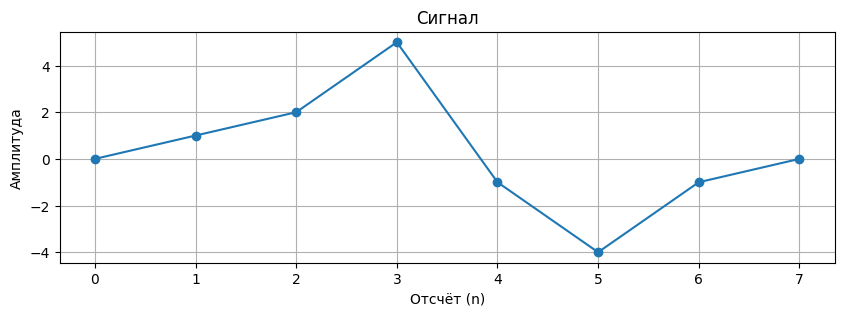

In [22]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(x, marker="o")
ax.set_title(f"Сигнал")
ax.set_xlabel("Отсчёт (n)")
ax.set_ylabel("Амплитуда")
ax.grid(True)
plt.show()

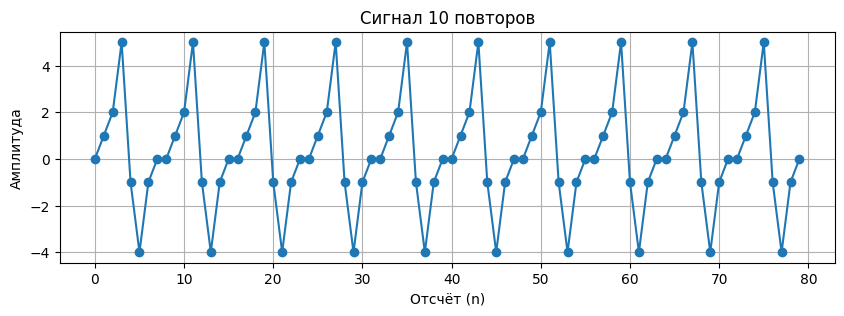

In [24]:
repeat = 10

fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(np.tile(x, repeat), marker="o")
ax.set_title(f"Сигнал {repeat} повторов")
ax.set_xlabel("Отсчёт (n)")
ax.set_ylabel("Амплитуда")
ax.grid(True)
plt.show()

In [ ]:
# Быстрое преобразование Фурье
X = np.fft.fft(x)
X

array([ 2. +0.j        ,  1.-10.07106781j, -2. +8.j        ,
        1. -4.07106781j, -2. +0.j        ,  1. +4.07106781j,
       -2. -8.j        ,  1.+10.07106781j])

Функция `np.fft.fft`:
* На входе - временные значения сигнала $x[n]$
* На выходе - массив длины $N$, где каждый элемент `X[k]` описывает гармоническую составляющую с частотой $k / N$ от частоты дискретизации

$$
X[k] = a + jb
$$

где:

* `a` – действительная часть
* `b` – мнимая часть
* `|X[k]|` – амплитуда гармоники (вклад частоты в сигнал)
* `arg(X[k])` или `np.angle(X[k])` – её фаза

$$
\varphi_k = \arg(X[k]) = \arctan\left(\frac{b}{a}\right)
$$

`arg(X[k])` показывает **сдвиг фазы гармоники** с частотой $k/N$ относительно начала отсчёта


In [ ]:
# Всего значений сигнал
N = len(x)
N

8

In [9]:
# Амплитуда
amplitude = np.abs(X) / N
amplitude

array([0.25      , 1.26507415, 1.03077641, 0.52401087, 0.25      ,
       0.52401087, 1.03077641, 1.26507415])

In [10]:
# Фаза
phase = np.angle(X)
phase

array([ 0.        , -1.4718264 ,  1.81577499, -1.32992934,  3.14159265,
        1.32992934, -1.81577499,  1.4718264 ])

In [12]:
# Ось частот
freqs = np.fft.fftfreq(N, d=1)
freqs

array([ 0.   ,  0.125,  0.25 ,  0.375, -0.5  , -0.375, -0.25 , -0.125])

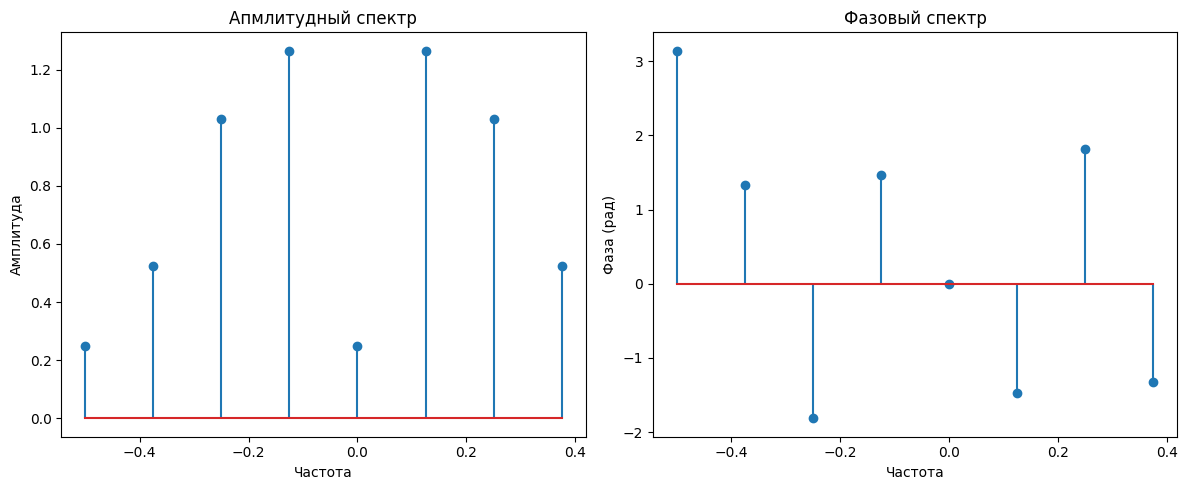

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
# Амплитудный спектр
ax[0].stem(freqs, amplitude)
ax[0].set_title(f"Апмлитудный спектр")
ax[0].set_xlabel("Частота")
ax[0].set_ylabel("Амплитуда")

# Фазовый спектр
ax[1].stem(freqs, phase)
ax[1].set_title(f"Фазовый спектр")
ax[1].set_xlabel("Частота")
ax[1].set_ylabel("Фаза (рад)")

fig.tight_layout()
plt.show()

In [17]:
# Вычисления и отображения спектров
def plot_spectra(signal, title_suffix=""):
    # Применяем БПФ
    X = np.fft.fft(signal)
    N = len(signal)
    
    # Амплитуда и фаза
    amplitude = np.abs(X) / N
    phase = np.angle(X)
    
    # Ось частот
    freqs = np.fft.fftfreq(N, d=1)
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Амплитудный спектр
    ax[0].stem(freqs, amplitude)
    ax[0].set_title(f"Апмлитудный спектр {title_suffix}")
    ax[0].set_xlabel("Частота")
    ax[0].set_ylabel("Амплитуда")
    
    # Фазовый спектр
    ax[1].stem(freqs, phase)
    ax[1].set_title(f"Фазовый спектр {title_suffix}")
    ax[1].set_xlabel("Частота")
    ax[1].set_ylabel("Фаза (рад)")
    
    fig.tight_layout()
    plt.show()

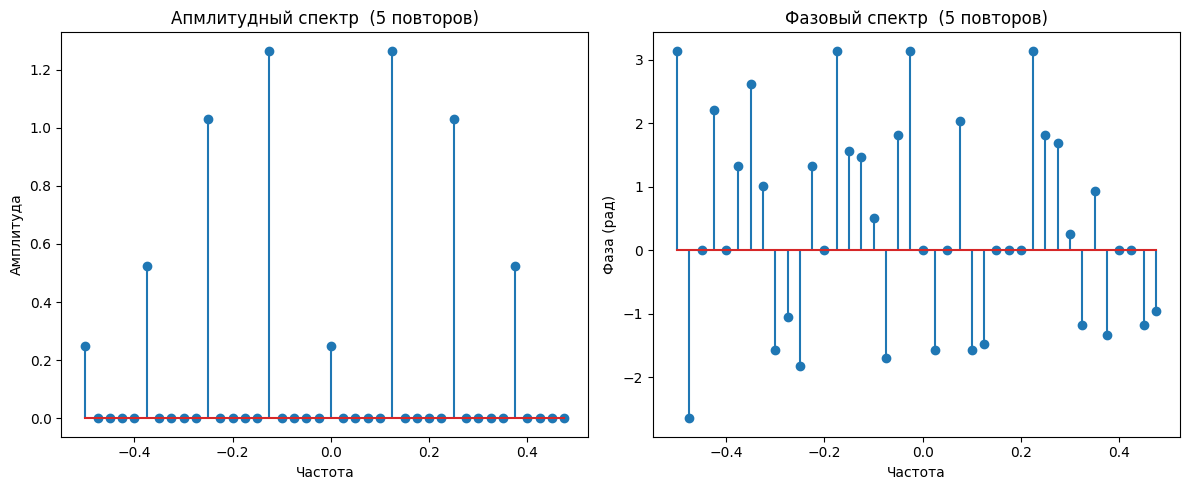

In [18]:
# Повторение сигнала 5 раз
signal_5 = np.tile(x, 5)
plot_spectra(signal_5, " (5 повторов)")

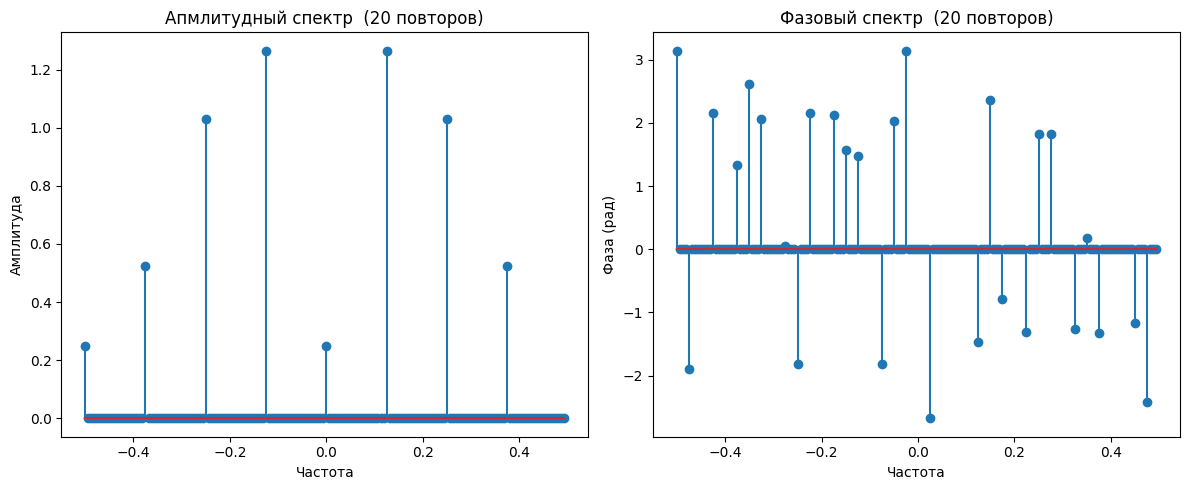

In [19]:
# Повторение сигнала 20 раз
signal_20 = np.tile(x, 20)
plot_spectra(signal_20, " (20 повторов)")

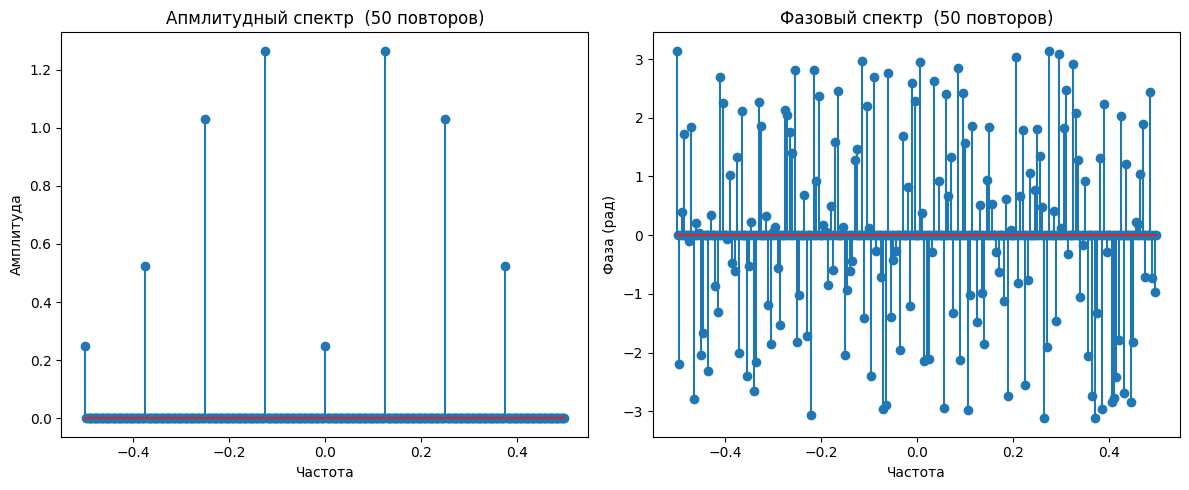

In [20]:
# Повторение сигнала 50 раз
signal_50 = np.tile(x, 50)
plot_spectra(signal_50, " (50 повторов)")

Т.к. сигнал один и тот же и мы берем просто его повторы - амплитудный спектр не меняется.

Фаза зависит от того "где начинается сигнал" относительно периода дискретизации. Длинна массива растет, частоты квантования меняются, поэтому спектр фазы начинает выглядеть хаотичнее.